# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [4]:
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
km = KMeans(n_clusters=8)

In [7]:
km.fit(X)

KMeans()

In [8]:
labels=km.labels_

In [9]:
silhouette_score(X, labels, metric='euclidean')

0.5406824747857625

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [10]:
km = KMeans(n_clusters=5)
km.fit(X)
labels=km.labels_
silhouette_score(X, labels, metric='euclidean')

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [11]:
km = KMeans(n_clusters=3)
km.fit(X)
labels=km.labels_
silhouette_score(X, labels, metric='euclidean')

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [12]:
# !pip3 install yellowbrick

In [13]:
from yellowbrick.cluster import KElbowVisualizer

/home/alba/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


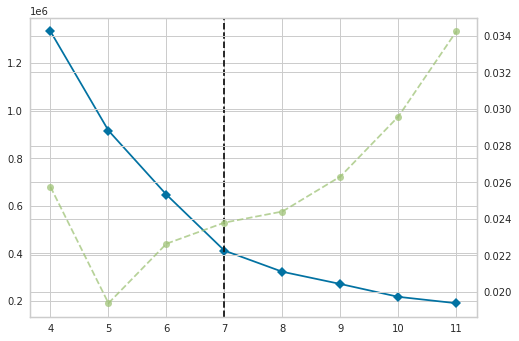

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)

In [15]:
# The best k is 7

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
aggclustering = AgglomerativeClustering().fit(X)

/home/alba/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

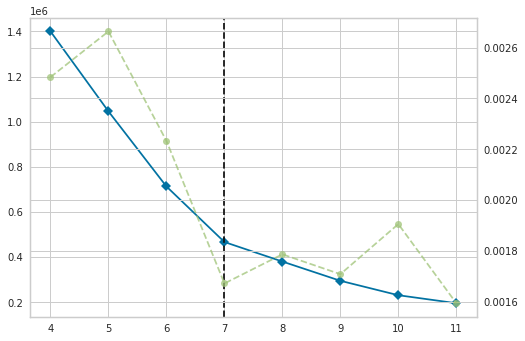

In [18]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)

In [19]:
# The results are the same as the elbow is in k=7

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [20]:
from sklearn.cluster import KMeans


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


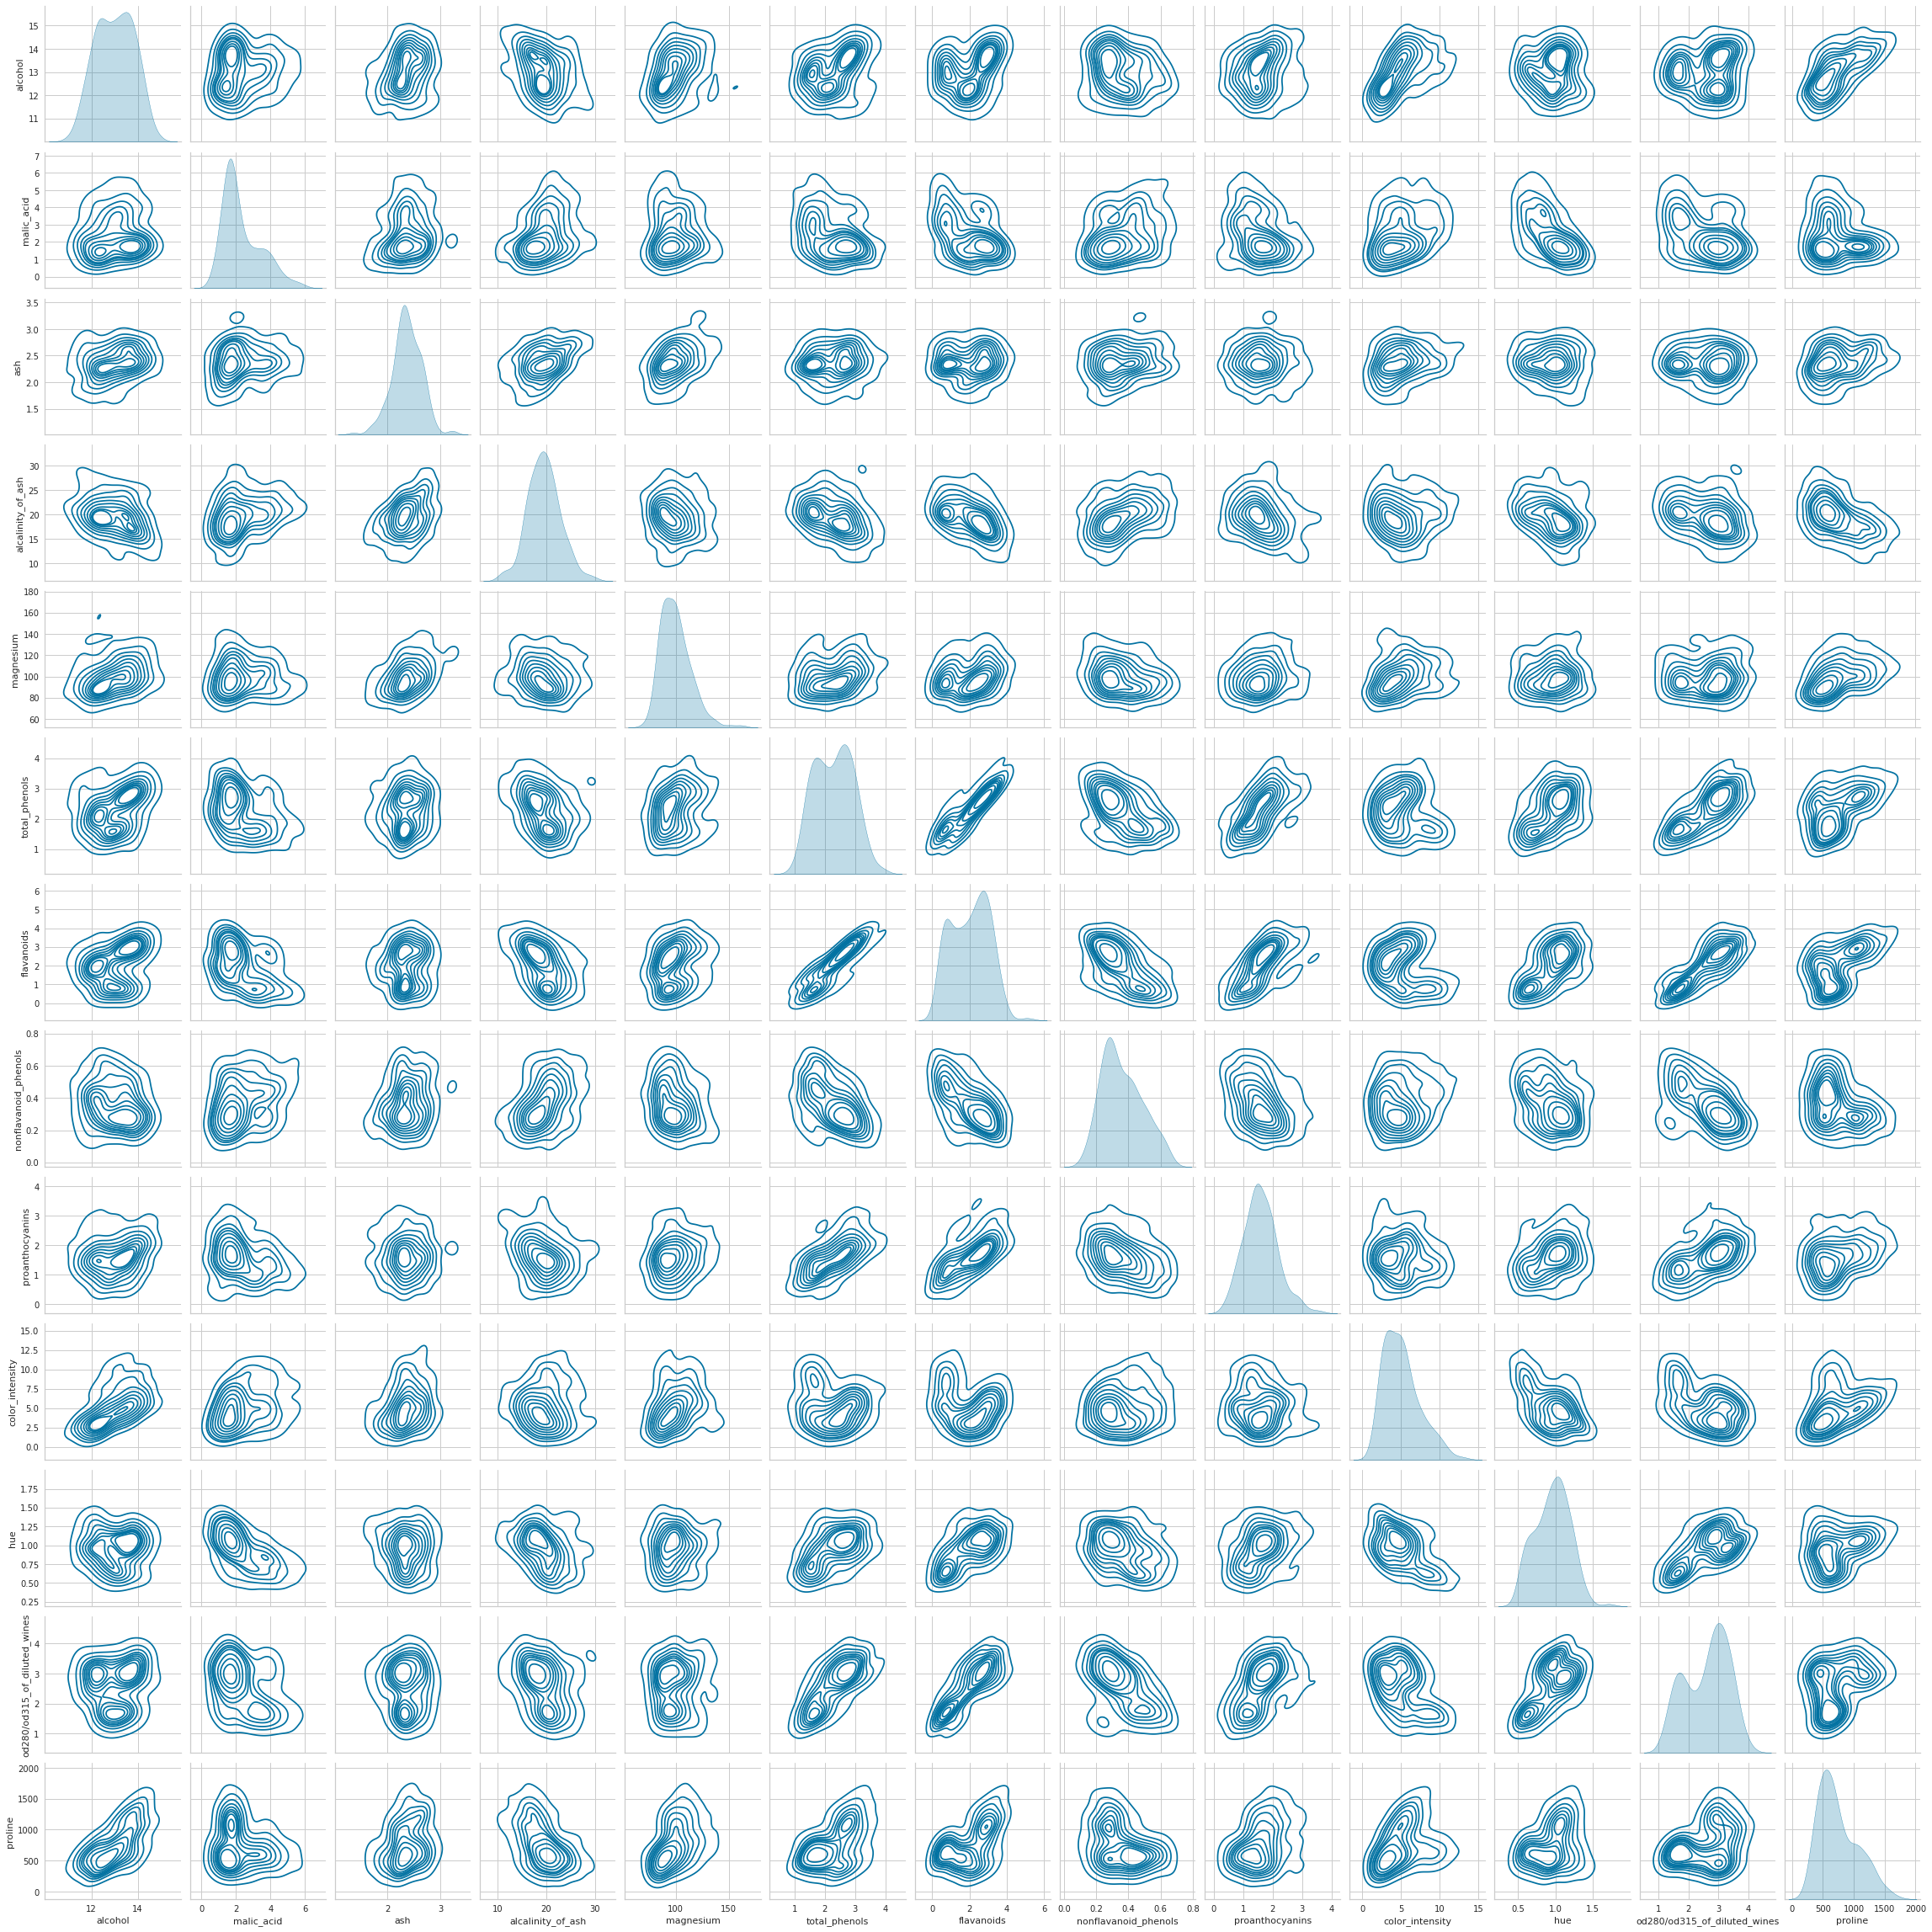

In [21]:
sns.pairplot(X, kind="kde")

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [23]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(2)
X_t = pca.fit_transform(X)


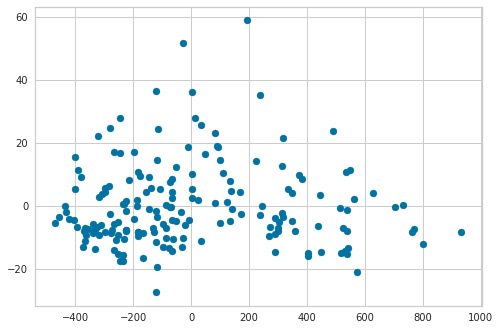

In [26]:
plt.scatter(X_t[:,0],X_t[:,1]);

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [28]:
from sklearn.manifold import TSNE

In [29]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200)
data_t = tsne.fit_transform(X)

/home/alba/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

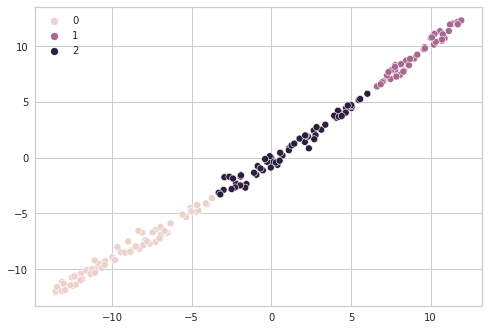

In [30]:
sns.scatterplot(data_t[:,0],data_t[:,1], hue=km.labels_)

/home/alba/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

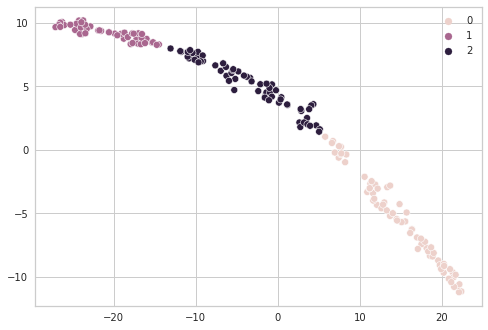

In [31]:
tsne = TSNE(n_components=2, perplexity=20, n_iter=1000, learning_rate=200)
data_t = tsne.fit_transform(X)
sns.scatterplot(data_t[:,0],data_t[:,1], hue=km.labels_)

/home/alba/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

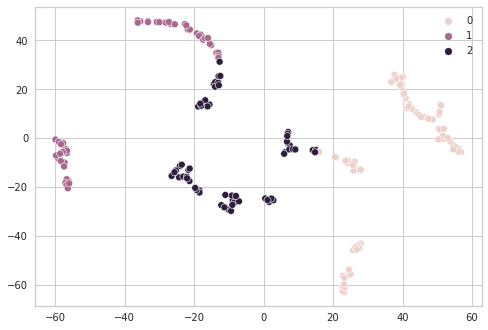

In [32]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, learning_rate=200)
data_t = tsne.fit_transform(X)
sns.scatterplot(data_t[:,0],data_t[:,1], hue=km.labels_)